## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
count_metadata = len(mouse_metadata['Mouse ID'])
print (count_metadata)
count_results = len(study_results)
print(count_results)
count_of_mice =len(mouse_study_df)
print(count_of_mice)



249
1893
1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_gpby  = mouse_study_df.groupby(['Mouse ID'])["Timepoint"].count()
new_df = pd.DataFrame(mouse_study_gpby)
#print(new_df)
print(new_df['Timepoint'].max())


13


In [6]:
count_TP10 =new_df.loc[new_df['Timepoint']>10]
count_TP10

,Timepoint
Mouse ID,
g989,13


In [7]:
# Optional: Get all the data for the duplicate mouse ID
new_df_duplicate = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
new_df_duplicate.head(13)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df1 = mouse_study_df.copy()
#clean_df1 = clean_df1.set_index('Mouse ID')
#clean_df = clean_df1.drop(['g989'])
clean_df = clean_df1.drop([clean_df1.index[908],clean_df1.index[909],clean_df1.index[910],clean_df1.index[911],clean_df1.index[912],clean_df1.index[913],clean_df1.index[914],clean_df1.index[915],clean_df1.index[916],clean_df1.index[917],clean_df1.index[918],clean_df1.index[919],clean_df1.index[920]])
clean_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df))

1880


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#a copy of the file is created
copyclean_df=clean_df.copy()
#grouped b Drug Regimen
grouped_copyclean_df = copyclean_df.groupby(['Drug Regimen'])
# a Dataframe is created
reg_df= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].mean())
reg_df['Mean']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].mean())
reg_df['Median']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].median())
reg_df['Variance']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].var())
reg_df['Standard deviation']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].std())
reg_df['SEM']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].sem())
reg_df['Total mice/time']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].count())
del reg_df['Tumor Volume (mm3)']
reg_df.head(10)


,Mean,Median,Variance,Standard deviation,SEM,Total mice/time
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
copyclean1_df =  clean_df.copy()
grouped_copyclean1_df= copyclean1_df.groupby(['Drug Regimen'])
grouped_copyclean1_df
reg_agg_df= grouped_copyclean1_df.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
reg_agg_df["Total mice/time"] = copyclean1_df.groupby(['Drug Regimen'])["Mouse ID"].count()
reg_agg_df.reset_index(inplace=True)
reg_agg_df.head(10)
# This method produces everything in a single groupby function

Drug Regimen Tumor Volume (mm3)                                            \
                             mean     median        var       std       sem   
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346   
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821   
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236   
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860   
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466   
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331   
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332   
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955   
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111   
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398   

  Total mice/time  
                   
0             230  
1             178  
2             178  
3             188  
4             186  
5             181  
6             148  
7             228  
8             181  
9             182

## Bar Plots

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#len(clean_df["Drug Regimen"]=='Capomulin'))
#clean_df[(clean_df['Drug Regimen']=='Capomulin').count()
#& (df['B']>0) & (df['C']>0)].count()
#x_axis= reg_agg_df["Drug Regimen"]
#y_axis= for drug in Drug Regimen count()

#Capomulin= len(clean_df.loc[clean_df['Drug Regimen']=='Capomulin'])
#Capomulin

#y_axis= len(clean_df.loc[clean_df['Drug Regimen']=='Capomulin']) ---- correct code
#y_axis
a_axis=len(clean_df[(clean_df['Drug Regimen']=='Capomulin')])
print(a_axis)
b_axis=len(clean_df[(clean_df['Drug Regimen']=='Ceftamin')])
print(b_axis)
c_axis=len(clean_df[(clean_df['Drug Regimen']=='Infubinol')])
print(c_axis)
d_axis=len(clean_df[(clean_df['Drug Regimen']=='Ketapril')])
print(d_axis)
e_axis=len(clean_df[(clean_df['Drug Regimen']=='Naftisol')])
print(e_axis)
f_axis=len(clean_df[(clean_df['Drug Regimen']=='Placebo')])
print(f_axis)
g_axis=len(clean_df[(clean_df['Drug Regimen']=='Propriva')])
print(g_axis)
h_axis=len(clean_df[(clean_df['Drug Regimen']=='Ramicane')])
print(h_axis)
i_axis=len(clean_df[(clean_df['Drug Regimen']=='Stelasyn')])
print(i_axis)
j_axis=len(clean_df[(clean_df['Drug Regimen']=='Zoniferol')])
print(j_axis)


230
178
178
188
186
181
148
228
181
182


In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

y_axis=len(clean_df[(clean_df['Drug Regimen']=='Capomulin')]), len(clean_df[(clean_df['Drug Regimen']=='Ceftamin')]), len(clean_df[(clean_df['Drug Regimen']=='Infubinol')]), len(clean_df[(clean_df['Drug Regimen']=='Ketapril')]), len(clean_df[(clean_df['Drug Regimen']=='Naftisol')]), len(clean_df[(clean_df['Drug Regimen']=='Placebo')]), len(clean_df[(clean_df['Drug Regimen']=='Propriva')]), len(clean_df[(clean_df['Drug Regimen']=='Ramicane')]),len(clean_df[(clean_df['Drug Regimen']=='Stelasyn')]),len(clean_df[(clean_df['Drug Regimen']=='Zoniferol')]) 
print(y_axis)


(230, 178, 178, 188, 186, 181, 148, 228, 181, 182)


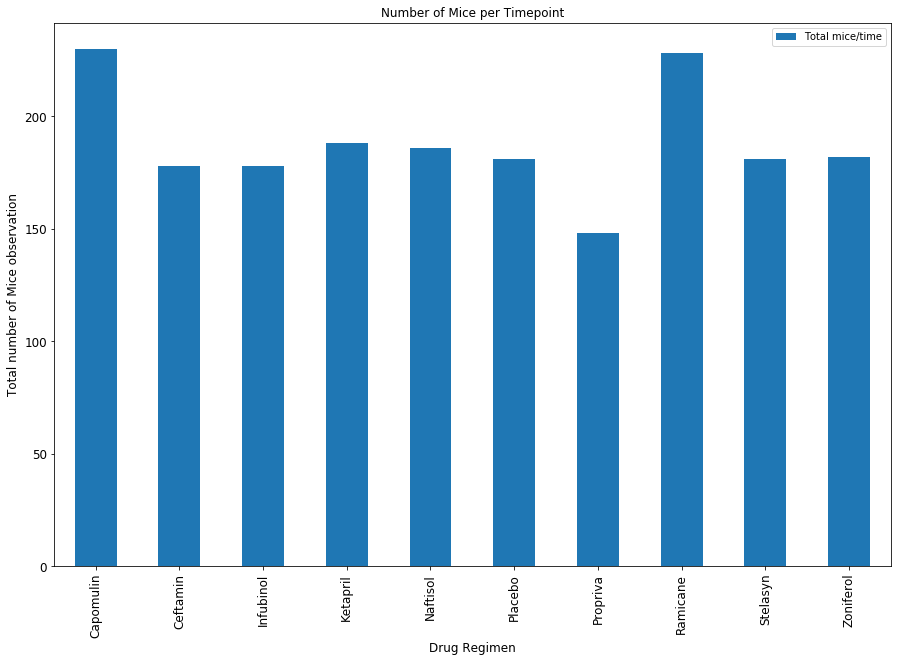

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
pd_bar= reg_df[['Total mice/time']].plot(kind='bar', title ="Number of Mice per Timepoint", figsize=(15, 10), legend=True, fontsize=12)
pd_bar.set_xlabel("Drug Regimen", fontsize=12)
pd_bar.set_ylabel("Total number of Mice observation", fontsize=12)
plt.show()

In [15]:
reg_agg_df

Drug Regimen Tumor Volume (mm3)                                            \
                             mean     median        var       std       sem   
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346   
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821   
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236   
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860   
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466   
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331   
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332   
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955   
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111   
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398   

  Total mice/time  
                   
0             230  
1             178  
2             178  
3             188  
4             186  
5             181  
6             148  
7             228  
8             181  
9             182

In [16]:
reg_agg_df.iloc[:,0]

0    Capomulin
1     Ceftamin
2    Infubinol
3     Ketapril
4     Naftisol
5      Placebo
6     Propriva
7     Ramicane
8     Stelasyn
9    Zoniferol
Name: (Drug Regimen, ), dtype: object



x_axis = np.arange(len(reg_agg_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,reg_agg_df.iloc[:,0]) #(location of the tick, name in the tick)

plt.bar(x_axis, reg_agg_df.iloc[:,6], color="b",alpha=.8,
        align="center", width=.7, bottom=None)  #plt bar(locations of the bars, bar height)
plt.tight_layout()


#plt.show()

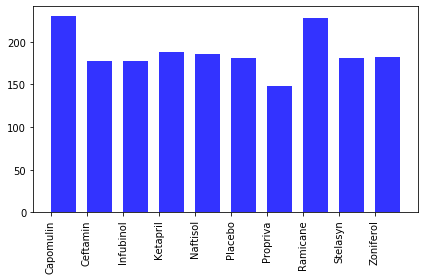

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(reg_agg_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,reg_agg_df.iloc[:,0]) #(location of the tick, name in the tick)

plt.bar(x_axis, reg_agg_df.iloc[:,6], color="b",alpha=.8,
        align="edge", width=.7, bottom=None)  #plt bar(locations of the bars, bar height)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Pie Plots

Sex
Female    922
Male      958
Name: Sex, dtype: int64


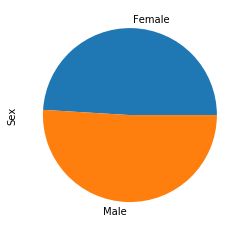

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_sums = clean_df.Sex.groupby(clean_df.Sex).count()
print(mf_sums)
#axis('equal')
#plot.pie(mf_sums, labels=mf_sums.index)
pd_pie= mf_sums.plot(kind='pie', y="mf_sums")
plt.show()

['Male' 'Female']


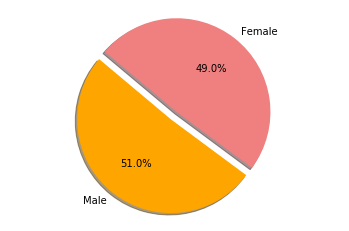

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count=len(clean_df[(clean_df['Sex']=='Male')]),len(clean_df[(clean_df['Sex']=='Female')])

# Labels for the sections of our pie chart
labels= clean_df['Sex'].unique() 
print(labels)
# The values of each section of the pie chart
sizes = mf_count

# The colors of each section of the pie chart
colors = ["orange", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(mf_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_gpby_df= clean_df.groupby(['Mouse ID'])["Timepoint"].max()
max_df= pd.DataFrame(max_gpby_df)
#print(max_df)

qob_df= pd.merge(clean_df, max_gpby_df, how="right", on=["Mouse ID", "Timepoint"])
print(qob_df)



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
243     z314     Stelasyn  Female          21          28          5   
244     z435     Propriva  Female          12          26         10   
245     z581    Infubinol  Female          24          25         45   
246     z795     Naftisol  Female          13          29         45   
247     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2  

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drugs=['Capomulin', 'Ramicane','Infubinol', 'Ceftamin']
tu_vol=[]
for drug in drugs:
    volume= qob_df.loc[qob_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    tu_vol.append(volume)
#print(tu_vol)
    quar= volume.quantile([0.25, 0.5, 0.75])
    low_b=quar[0.25]
    up_b=quar[0.75]
    iqr=up_b-low_b
    up_outliers= up_b+1.5*iqr
    low_outliers= low_b-1.5*iqr
    print(f"Tumor Volume:{volume}")
    print(f"Quantiles:{quar}")
    print(f"Lower Boundary:{low_b}")
    print(f"Upper Boundary:{up_b}")
    print(f"IQR:{iqr}")
    print(f"upper outliers:{up_outliers}")
    print(f"lower outliers:{low_outliers}")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

Tumor Volume:1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
180    46.539206
Name: Tumor Volume (mm3), dtype: float64
Quantiles:0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Lower Boundary:32.37735684
Upper Boundary:40.1592203
IQR:7.781863460000004
upper outliers:51.83201549
lower outliers:20.70456164999999
Tumor Volume:0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342

{'whiskers': [<matplotlib.lines.Line2D at 0x1f56f787630>,
 'caps': [<matplotlib.lines.Line2D at 0x1f56f787cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f56f769e48>,
 'medians': [<matplotlib.lines.Line2D at 0x1f56f7943c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f56f794710>,
 'means': []}

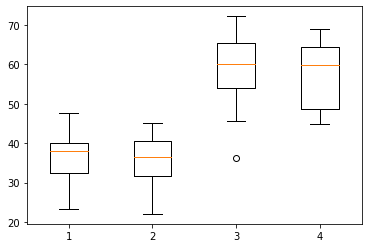

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tu_vol)

## Line and Scatter Plots

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   
5     k403     Ramicane  Male          21          16         25   
6     k403     Ramicane  Male          21          16         30   
7     k403     Ramicane  Male          21          16         35   
8     k403     Ramicane  Male          21          16         40   
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  

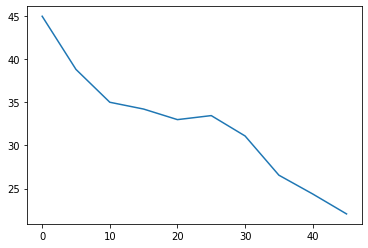

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

a= clean_df.loc[clean_df["Mouse ID"]== 'k403']
print(a)
plt.plot(a['Timepoint'], a['Tumor Volume (mm3)'])
plt.show()


#y_axis= qob_df.loc[qob_df["Drug Regimen"]== 'Capomulin', "Tumor Volume (mm3)"]
#x_axis= np.arange(0,25,1)
#plt.plot(x_axis, y_axis)
#plt.show()

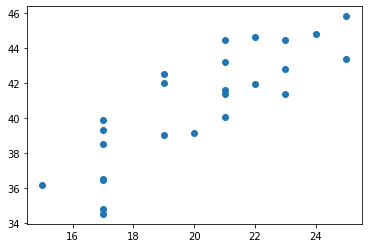

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
b= clean_df.loc[clean_df["Drug Regimen"]== 'Capomulin']
#print(b)
avg= b.groupby(["Mouse ID"]).mean()
plt.scatter(avg['Weight (g)'], avg["Tumor Volume (mm3)"])
plt.show()


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor= st.pearsonr(avg['Weight (g)'], avg["Tumor Volume (mm3)"])
cor

(0.8419363424694717, 1.322572243471279e-07)

In [26]:
lin_reg= st.linregress(avg['Weight (g)'], avg["Tumor Volume (mm3)"])
lin_reg

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

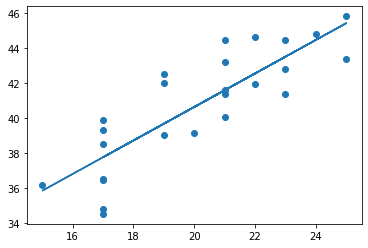

In [27]:
plt.scatter(avg['Weight (g)'], avg["Tumor Volume (mm3)"])
y= avg['Weight (g)']*lin_reg[0]+ lin_reg[1]
plt.plot(avg['Weight (g)'],y)
plt.show()